In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
covid_data_path = '../data.csv'
news_data_path = './noticias_en_classification.csv'
tweets_data_path = './tweets_en_classification.csv'
medidas_data_path = '../extra/medidas_governamentais/medidas_governamentais.csv'

In [5]:
df_covid = pd.read_csv(covid_data_path)
df_news = pd.read_csv(news_data_path, index_col='Unnamed: 0')
df_tweets = pd.read_csv(tweets_data_path, index_col='Unnamed: 0').drop(columns='Unnamed: 0.1')
df_medidas = pd.read_csv(medidas_data_path)

In [6]:
df_covid.tail(3)

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos
216,29-09-2020,29-09-2020 00:00,74717,26735,6076,38294,1499,1622,269,222,...,116.0,151.0,238.0,737.0,577.0,976.0,987.0,NaN,NaN,24561.0
217,30-09-2020,30-09-2020 00:00,75542,27029,6158,38692,1502,1663,274,224,...,116.0,151.0,238.0,743.0,578.0,983.0,988.0,NaN,NaN,25041.0
218,01-10-2020,01-10-2020 00:00,76396,27369,6212,39107,1510,1693,275,230,...,116.0,152.0,239.0,745.0,579.0,987.0,990.0,NaN,NaN,25482.0


In [7]:
df_medidas.tail(3)

,data,local,tipo,desc
117,01-07-2020,AML,Medidas,"Estabelecimentos fecham às 20h, excepto superm..."
118,02-07-2020,Portugal,Medidas,Nacionalização da EFACEC
119,02-07-2020,Portugal,Medidas,Ajuda financeira à TAP


In [8]:
df_covid.columns

Index(['data', 'data_dados', 'confirmados', 'confirmados_arsnorte',
       'confirmados_arscentro', 'confirmados_arslvt',
       'confirmados_arsalentejo', 'confirmados_arsalgarve',
       'confirmados_acores', 'confirmados_madeira', 'confirmados_estrangeiro',
       'confirmados_novos', 'recuperados', 'obitos', 'internados',
       'internados_uci', 'lab', 'suspeitos', 'vigilancia', 'n_confirmados',
       'cadeias_transmissao', 'transmissao_importada', 'confirmados_0_9_f',
       'confirmados_0_9_m', 'confirmados_10_19_f', 'confirmados_10_19_m',
       'confirmados_20_29_f', 'confirmados_20_29_m', 'confirmados_30_39_f',
       'confirmados_30_39_m', 'confirmados_40_49_f', 'confirmados_40_49_m',
       'confirmados_50_59_f', 'confirmados_50_59_m', 'confirmados_60_69_f',
       'confirmados_60_69_m', 'confirmados_70_79_f', 'confirmados_70_79_m',
       'confirmados_80_plus_f', 'confirmados_80_plus_m', 'sintomas_tosse',
       'sintomas_febre', 'sintomas_dificuldade_respiratoria',
     

In [9]:
df_covid['data'] = pd.to_datetime(df_covid['data'], errors= "coerce", dayfirst=True).dt.tz_localize(None)
df_news['data'] = pd.to_datetime(df_news['data'], errors= "coerce").dt.tz_localize(None)
df_tweets['date'] = pd.to_datetime(df_tweets['date'], errors= "coerce", format="%Y-%m-%d").dt.tz_localize(None)
df_medidas['data'] = pd.to_datetime(df_medidas['data'], errors= "coerce", dayfirst=True).dt.tz_localize(None)

<AxesSubplot:>

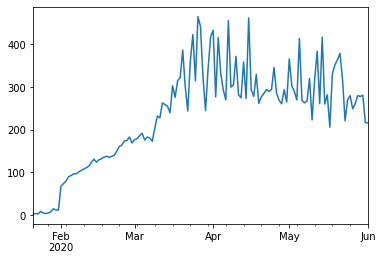

In [10]:
df_news[df_news.data <= '2020/06/01'].data.value_counts().sort_index().plot()

<AxesSubplot:>

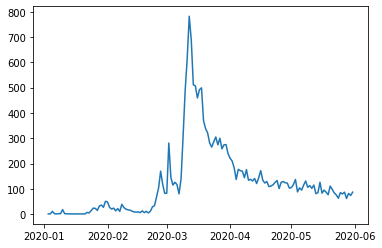

In [11]:
df_tweets[df_tweets.date <= '2020/06/01'].date.dt.date.value_counts().sort_index().plot()

<AxesSubplot:xlabel='data'>

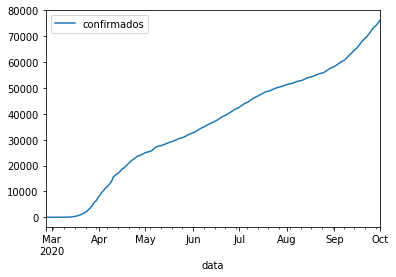

In [12]:
df_covid.plot(x='data', y='confirmados')

<AxesSubplot:xlabel='data'>

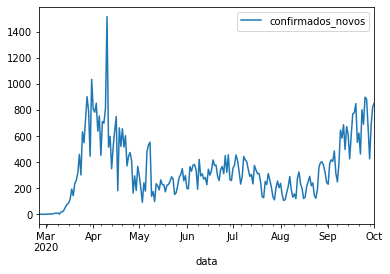

In [13]:
df_covid.plot(x='data', y='confirmados_novos')

<AxesSubplot:xlabel='data'>

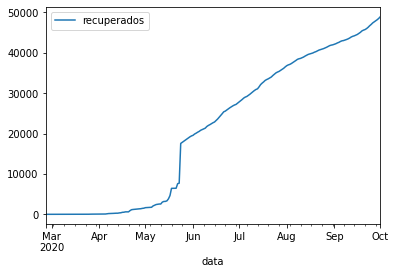

In [14]:
df_covid.plot(x='data', y='recuperados')

<AxesSubplot:xlabel='data'>

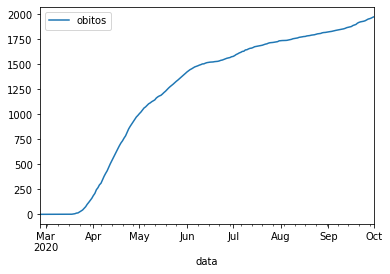

In [15]:
df_covid.plot(x='data', y='obitos')

<AxesSubplot:xlabel='data'>

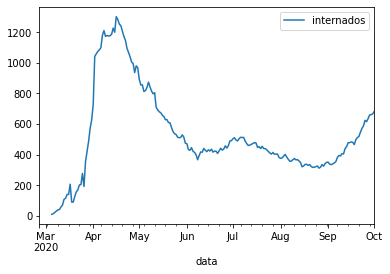

In [16]:
df_covid.plot(x='data', y='internados')

<AxesSubplot:xlabel='data'>

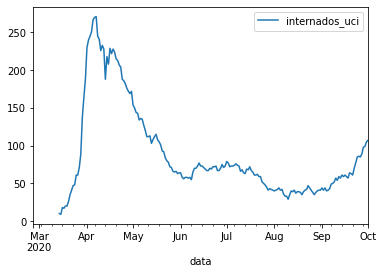

In [17]:
df_covid.plot(x='data', y='internados_uci')

In [18]:
obitos_novos = [0]
obitos_novos.extend([obitoshoje - obitosontem for obitoshoje, obitosontem in zip(df_covid['obitos'].iloc[1:].values, df_covid['obitos'].iloc[:-1].values)])
df_covid['obitos_novos'] = obitos_novos

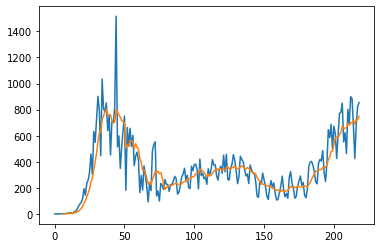

In [19]:
plt.plot(df_covid['confirmados_novos'])
plt.plot(df_covid['confirmados_novos'].rolling(7).mean())

## Filtering data up to the last of June

In [20]:
df_covid_uptojune = df_covid[df_covid.data < '2020/07/01']
df_news_uptojune = df_news[df_news.data < '2020/07/01']
df_tweets_uptojune = df_tweets[df_tweets.date < '2020/07/01']
df_medidas_uptojune = df_medidas[df_medidas.data < '2020/07/01']

In [21]:
print('covid:   ', max(df_covid_uptojune.data.unique()))
print('news:    ', max(df_news_uptojune.data.unique()))
print('tweets:  ', max(df_tweets_uptojune.date.unique()))
print('medidas: ', max(df_medidas_uptojune.data.unique()))

covid:    2020-06-30T00:00:00.000000000
news:     2020-06-30T00:00:00.000000000
tweets:   2020-06-30T23:23:59.000000000
medidas:  2020-06-23T00:00:00.000000000


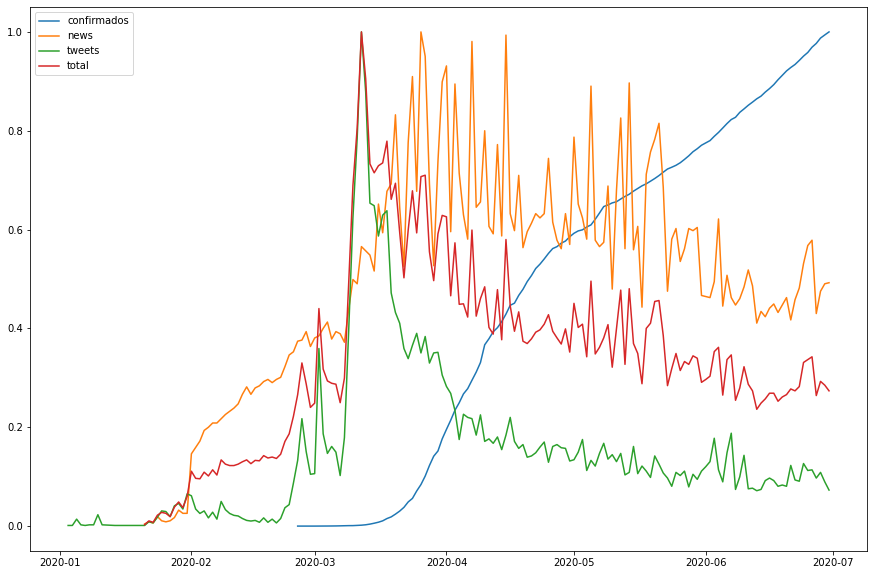

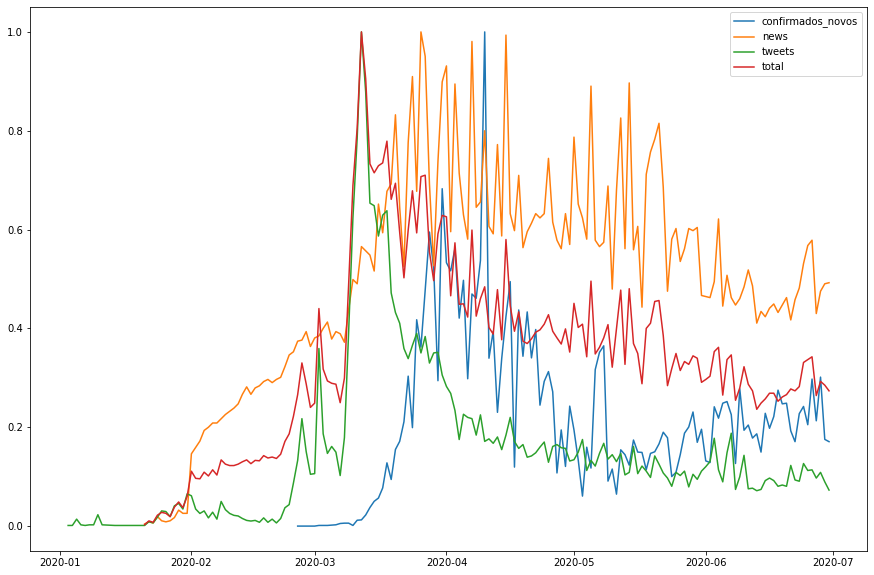

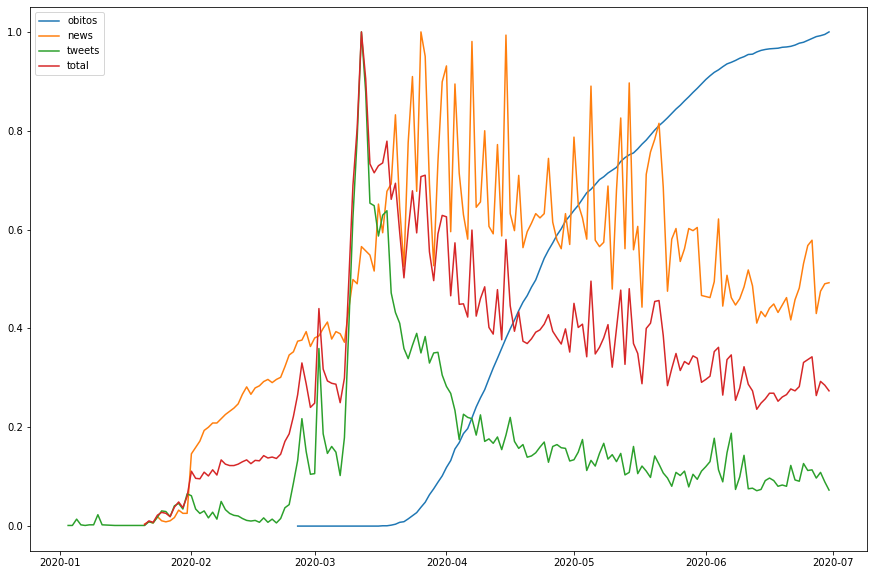

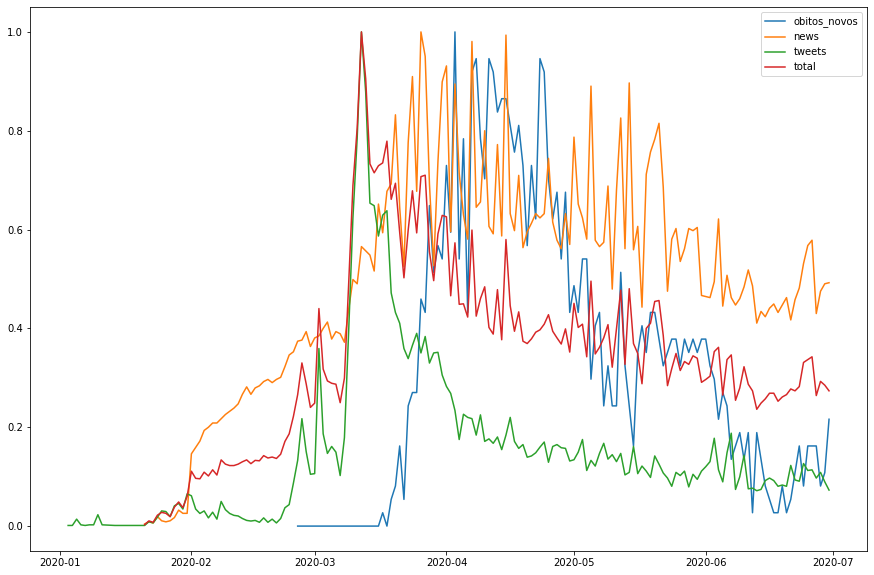

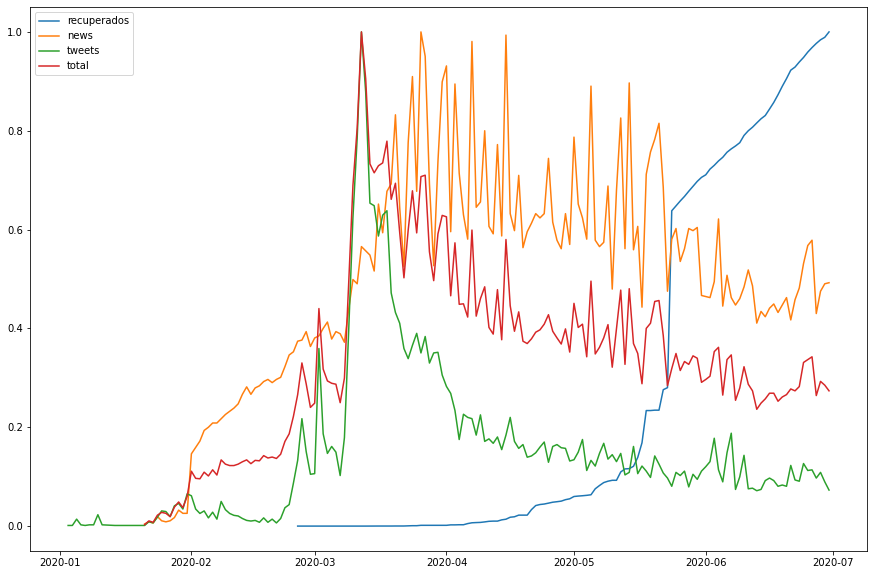

In [22]:
for col in ['confirmados', 'confirmados_novos', 'obitos', 'obitos_novos', 'recuperados']:
    fig, ax = plt.subplots(figsize=(15,10))
    y_covid = df_covid_uptojune[col]
    ax.plot(df_covid_uptojune.data, y_covid/max(y_covid), label=col)
    y_news = df_news_uptojune.data.value_counts().sort_index()
    ax.plot(y_news/max(y_news), label='news')
    y_tweets = df_tweets_uptojune.date.dt.date.value_counts().sort_index()
    ax.plot(y_tweets/max(y_tweets), label='tweets')
    y_total = y_news + y_tweets
    ax.plot(y_total/max(y_total.dropna()), label='total')
    plt.legend()

In [23]:
df_covid[df_covid.data.dt.month == 6][['data', 'confirmados']]

,data,confirmados
96,2020-06-01,32700
97,2020-06-02,32895
98,2020-06-03,33261
99,2020-06-04,33592
100,2020-06-05,33969
101,2020-06-06,34351
102,2020-06-07,34693
103,2020-06-08,34885
104,2020-06-09,35306
105,2020-06-10,35600


In [24]:
df_covid[df_covid.confirmados > 0][['data', 'confirmados']]

,data,confirmados
5,2020-03-02,2
6,2020-03-03,4
7,2020-03-04,6
8,2020-03-05,9
9,2020-03-06,13
...,...,...
214,2020-09-27,73604
215,2020-09-28,74029
216,2020-09-29,74717
217,2020-09-30,75542


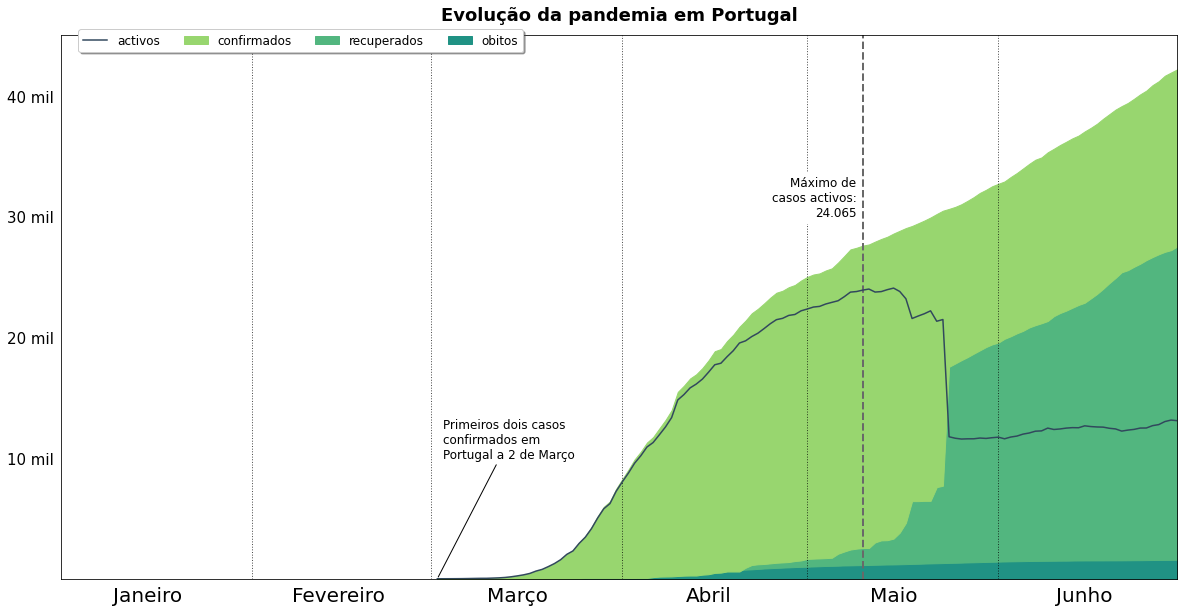

In [44]:
fig, ax = plt.subplots(figsize=(20,10))
y_dict = {col: df_covid_uptojune[df_covid_uptojune.confirmados > 0][col].values for col in ['obitos', 'recuperados', 'confirmados']}
y_activos = y_dict['confirmados'] - (y_dict['recuperados'] + y_dict['obitos'])
#y_list = [y_list_temp[0], y_list_temp[1]-y_list_temp[0], y_list_temp[2]-(y_list_temp[1]-y_list_temp[0])]

#ax.stackplot(df_covid_uptojune[df_covid_uptojune.confirmados > 0].data, y_list, colors=['black', 'green', 'blue'], alpha=0.3, labels=['obitos', 'recuperados', 'confirmados'])

x = df_covid_uptojune[df_covid_uptojune.confirmados > 0].data
y = len(x)*np.zeros(x.shape[0])
#c = ['gray', 'mediumseagreen', 'cornflowerblue']
c = ["dimgrey", #grey
"#209284",      #turquoise
"#52b67f",      #teal
"#98d66f",      #green
"#31485d"]      #yellow
label_dict = {'obitos': c[1], 'recuperados': c[2], 'confirmados': c[3]}
for label, color in label_dict.items():
    yp = np.copy(y)
    y = y_dict[label]
    ax.fill_between(x, yp, y, color=color, alpha=1, label=label)

ax.plot(df_covid_uptojune[df_covid_uptojune.confirmados > 0].data, y_activos, color=c[4], label='activos')
ax.tick_params(axis='y', which='both', left=False, right=False, labelright=False, labelleft=True, labelsize=15)
ax.tick_params(axis='x', which='both', bottom=False, labelsize=20)
ax.set(xlim=('2020-01-01', '2020-06-30'), ylim=(0, 45000))
ax.set_yticks((10000, 20000, 30000, 40000)) 
ax.set_yticklabels(('10 mil', '20 mil', '30 mil', '40 mil'))
ax.set_xticks(('2020-01-15', '2020-02-15', '2020-03-15', '2020-04-15', '2020-05-15', '2020-06-15'))
ax.set_xticklabels(('Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho'))
for pos in ['2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01']:
    ax.vlines(x=pos, ymin=0, ymax=45000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x='2020-05-10', ymin=0, ymax=45000, color=c[0], linewidth=2, linestyles='dashed')
ax.annotate('Primeiros dois casos\nconfirmados em\nPortugal a 2 de Março',
            ('2020-03-02', 2), ('2020-03-03', 10000),
            arrowprops=dict(arrowstyle='-'),
            size=12)
ax.annotate('Máximo de\ncasos activos:\n24.065',
            ('2020-05-10', 40000), ('2020-05-09', 30000),
            size=12, ha='right',
            bbox=dict(facecolor='white', edgecolor='white'))
#ax.annotate('24.065\ncasos\nactivos',
#            ('2020-05-10', 24100), ('2020-05-13', 17000),
#            arrowprops=dict(arrowstyle='-'),
#            size=12,
#            bbox=dict(facecolor='white', alpha=0.4, edgecolor='white'))
#ax.annotate('Actualização de\nrecuperados\nem atraso',
#            ('2020-05-24', 15000), ('2020-05-31', 15300),
#            arrowprops=dict(arrowstyle='-'),
#            size=12,
#           bbox=dict(facecolor='white', alpha=0.4, edgecolor='white'))
label_dict = {label: handle for handle, label in zip(*ax.get_legend_handles_labels())}
label_order = ['activos', 'confirmados', 'recuperados', 'obitos']
handle_order = [label_dict[label] for label in label_order]
plt.legend(handle_order, label_order,
           loc='center left', fontsize=12, frameon=True,
           bbox_to_anchor=(0.01, 0.99),
           ncol=4, fancybox=True, shadow=True)

title_font = {'fontsize': 18,
              'fontweight' : 600,
              'horizontalalignment': 'center'}
plt.title('Evolução da pandemia em Portugal', fontdict=title_font, pad=15)

plt.savefig('casos_tempo_com_titulo.png', dpi=200, bbox_inches='tight')

In [26]:
max(df_covid_uptojune.confirmados_novos)

1516

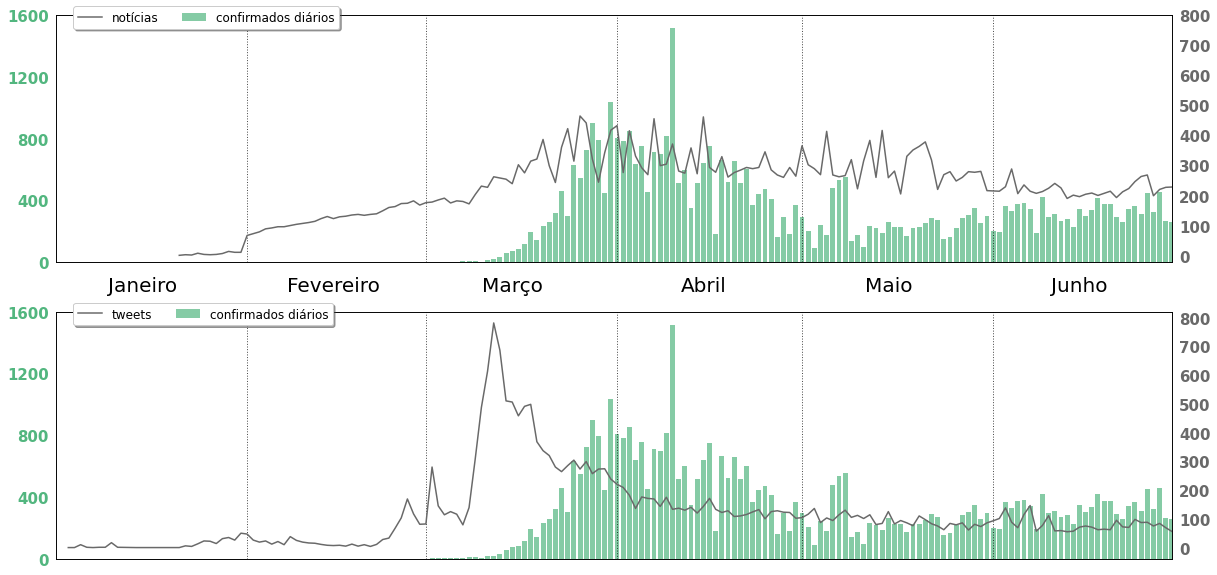

In [57]:
fig, ax = plt.subplots(2, 1, figsize=(20,10), sharex=True)
plt.subplots_adjust(hspace=0.2)
plt.rcParams.update({
    "figure.facecolor": "white",
    "figure.edgecolor": "white"})

c = ["dimgrey", #grey
     "#209284", #turquoise
     "#52b67f", #teal
     "#98d66f", #green
     "#eeef63"] #yellow

y_news = df_news_uptojune.data.value_counts().sort_index()
y_tweets = df_tweets_uptojune.date.dt.date.value_counts().sort_index()
y_total = y_news + y_tweets
y_covid = df_covid_uptojune['confirmados_novos']

ax[0].bar(df_covid_uptojune.data, y_covid, alpha=0.7, color=c[2], label='confirmados diários')
ax[1].bar(df_covid_uptojune.data, y_covid, alpha=0.7, color=c[2], label='confirmados diários')

ax0_2 = ax[0].twinx()
ax1_2 = ax[1].twinx()

ax0_2.plot(y_news, color=c[0], label='notícias')
ax1_2.plot(y_tweets, color=c[0], label='tweets')

ax[0].tick_params(axis='x', which='both', bottom=False, labeltop=False, labelbottom=True, labelsize=20, pad=10)
ax[1].tick_params(axis='x', which='both', bottom=False, labeltop=False, labelbottom=False, labelsize=20)
ax[0].set_xticks(('2020-01-15', '2020-02-15', '2020-03-15', '2020-04-15', '2020-05-15', '2020-06-15'))
ax[0].set_xticklabels(('Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho'))

for axis, axis_2, ylim in zip(ax,
                              (ax0_2, ax1_2),
                              ((0, 100, 200, 300, 400, 500, 600, 700, 800), (0, 100, 200, 300, 400, 500, 600, 700, 800))):
    
    axis.set(xlim=('2020-01-01', '2020-06-30'), ylim=(0, 1600))
    
    axis.tick_params(axis='y', which='both', left=False)
    axis.tick_params(axis='y', labelcolor=c[2], labelsize=15)
    axis.set_yticks((0, 400, 800, 1200, 1600))
    axis.set_yticklabels((0, 400, 800, 1200, 1600), fontdict={'fontweight': 'heavy'})
    
    axis_2.tick_params(axis='y', which='both', right=False)
    axis_2.tick_params(axis='y', labelcolor=c[0], labelsize=15)
    axis_2.set_yticks(ylim)
    axis_2.set_yticklabels(ylim, fontdict={'fontweight': 'heavy'})
    
    for pos in ['2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01']:
        axis.vlines(x=pos, ymin=0, ymax=1600, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
        
    axis_leg = [(handle, label) for handle, label in zip(*axis.get_legend_handles_labels())]
    axis_2_leg = [(handle, label) for handle, label in zip(*axis_2.get_legend_handles_labels())]
    
    axis_handle_leg = [axis_2_leg[0][0], axis_leg[0][0]]
    axis_handle_order = [axis_2_leg[0][1], axis_leg[0][1]]

    axis_2.legend(axis_handle_leg, axis_handle_order,
                  loc='center left', fontsize=12, frameon=True,
                  bbox_to_anchor=(0.01, 0.99),
                  ncol=2, fancybox=True, shadow=True, facecolor='white')
title_font = {'fontsize': 18,
              'fontweight' : 600,
              'horizontalalignment': 'center'}
#ax[0].set_title('Número de casos diários e de notícias e tweets relacionados com o vírus', fontdict=title_font, pad=20)

plt.savefig('quantidades_tempo_escala_igual_sem_titulo.png', dpi=200, bbox_inches='tight')